# Lab | Matplotlib & Seaborn

#### Import all the necessary libraries here:

In [1]:
# Libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

## Challenge 1

#### The data we will use in this challenge is:

In [2]:
x = np.arange(0,100)
y = x*2
z = x**2

#### Plot (x, y) and (x, z).
There are 2 ways of doing this. Do in both ways.

**Hint**: Check out the nrows, ncols and index arguments of subplots. 

Also, play around with the linewidth and style. Use the ones you're most happy with.

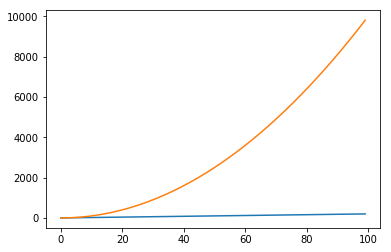

In [3]:
# Method 1
plt.plot(x,y)

plt.plot(x,z)

plt.show()

#### Use plt.subplots(nrows=1, ncols=2) to create the plot.

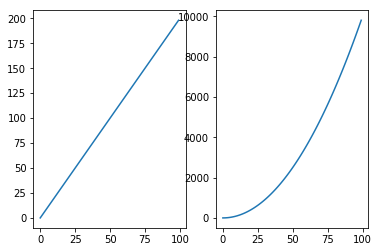

In [4]:
# Method 2

fig, axs = plt.subplots(1, 2)

axs[0].plot(x,y)
axs[1].plot(x,z)

#### Use your previous code but now, resize your plot.
**Hint**: Add the figsize argument in plt.subplots().

If you want, try to add a title to the plot or even axes labels. You can also play with the fontweight and fontsize of the titles and labels. 

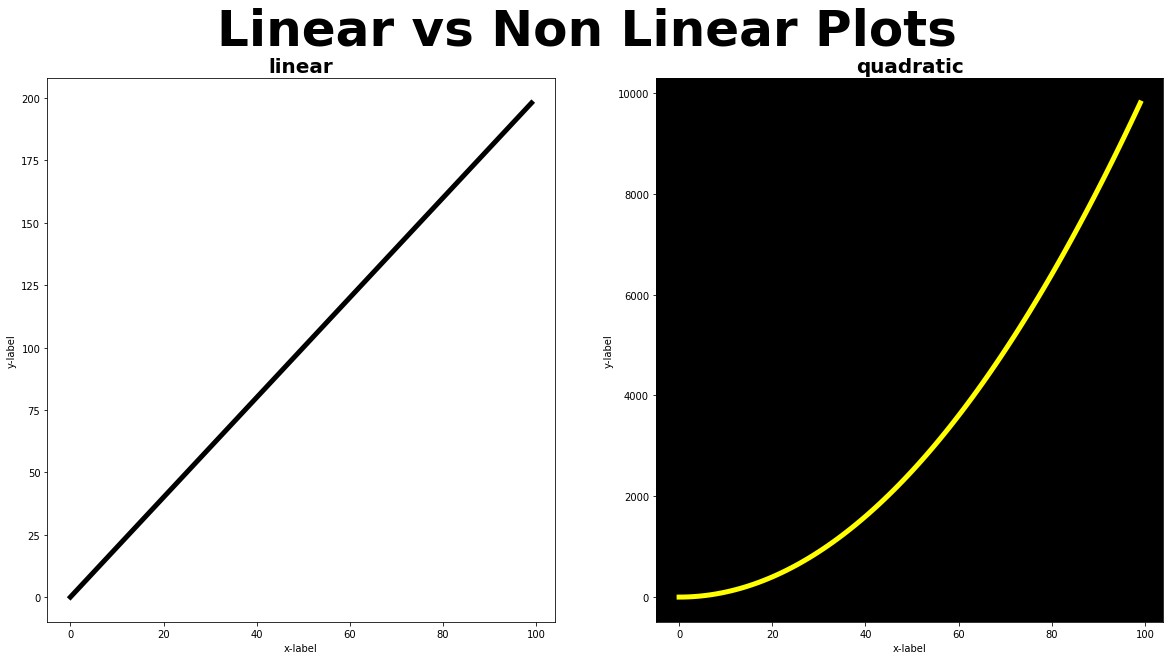

In [5]:
# your code here

fig, axs = plt.subplots(1, 2, figsize=(20, 10))
fig.suptitle('Linear vs Non Linear Plots', fontweight="bold",  size=50)
axs[0].plot(x,y, color='black', linewidth=5)
axs[0].set_title('linear', fontweight="bold", size=20)
axs[0].set_facecolor('white')
axs[1].plot(x,z, color='yellow', linewidth=5)
axs[1].set_title('quadratic', fontweight="bold", size=20, )
axs[1].set_facecolor('black')




for ax in axs.flat:
    ax.set(xlabel='x-label', ylabel='y-label')



#### Plot both $y=x^2$ and $y=e^x$ in the same plot using normal and logarithmic scale.
**Hint**: Use `set_xscale` and `set_yscale`.

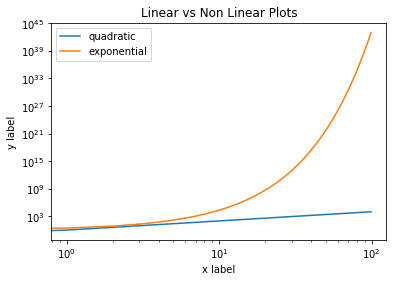

In [6]:
# your code here

plt.plot(x**2, label='quadratic')
plt.plot(np.exp(x), label='exponential')   ## TODO: show the multiple plots on the same plot!
plt.xscale('log')
plt.yscale('log')
#plt.xscale('linear')  # to linear scale uncomment this one! and the on bellow and coment the two lines up
#plt.yscale('linear')


plt.xlabel('x label')
plt.ylabel('y label')

plt.title("Linear vs Non Linear Plots")
plt.legend()
plt.show()



#### As a bonus challenge, try to add a legend to the plot.

In [9]:
# your code here
#

## Challenge 2
#### Import the `Fitbit2` dataset and store it in a variable called `fitbit`. You can find the dataset in Ironhack's database:
* db: `fitbit`
* table: `fitbit2`

In [10]:
# your code here

fitbit = pd.read_csv('Fitbit2.csv')
fitbit2 = fitbit[['Work_or_Weekend','Months_encoded', 'Steps']]

fitbit

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,...,Distance_miles,Days,Days_encoded,Work_or_Weekend,Hours Sleep,Sleep efficiency,Yesterday_sleep,Yesterday_sleep_efficiency,Months,Months_encoded
0,2015-05-08,1934,905,0.65,0,1.355,46,0,0,1680,...,0.403891,Friday,4.0,1,6.400000,92.086331,0.000000,0.000000,May,5
1,2015-05-09,3631,18925,14.11,4,611.000,316,61,60,2248,...,8.767545,Saturday,5.0,0,7.566667,92.464358,6.400000,92.086331,May,5
2,2015-05-10,3204,14228,10.57,1,602.000,226,14,77,1719,...,6.567891,Sunday,6.0,0,6.450000,88.761468,7.566667,92.464358,May,5
3,2015-05-11,2673,6756,5.02,8,749.000,190,23,4,9620,...,3.119282,Monday,0.0,1,5.183333,88.857143,6.450000,88.761468,May,5
4,2015-05-12,2495,502,3.73,1,876.000,171,0,0,7360,...,2.317714,Tuesday,1.0,1,6.783333,82.892057,5.183333,88.857143,May,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,2016-05-03,3796,18588,14.13,16,599.000,275,49,79,236,...,8.779972,Tuesday,1.0,1,6.283333,91.951220,5.233333,90.229885,May,5
363,2016-05-04,3525,16382,12.39,16,684.000,333,10,55,2075,...,7.698787,Wednesday,2.0,1,6.766667,95.081967,6.283333,91.951220,May,5
364,2016-05-05,3649,21913,16.40,19,701.000,287,29,90,2249,...,10.190484,Thursday,3.0,1,4.666667,88.888889,6.766667,95.081967,May,5
365,2016-05-06,3539,19023,14.79,15,575.000,298,8,85,2112,...,9.190077,Friday,4.0,1,6.166667,89.805825,4.666667,88.888889,May,5


#### From the Fitbit data, we want to visually understand:

How the average number of steps change by month. Use the appropriate visualization to show the median steps by month. Is Fitbitter more active on weekend or workdays? All plots must be in the same jupyter notebook cell.

**Hints**:

* Use Months_encoded and Week_or Weekend columns.
* Use matplolib.pyplot object oriented API.
* Set your size figure to 12,4
* Explore plt.sca
* Explore plt.xticks
* Save your figures in a folder called `figures` in your repo. 

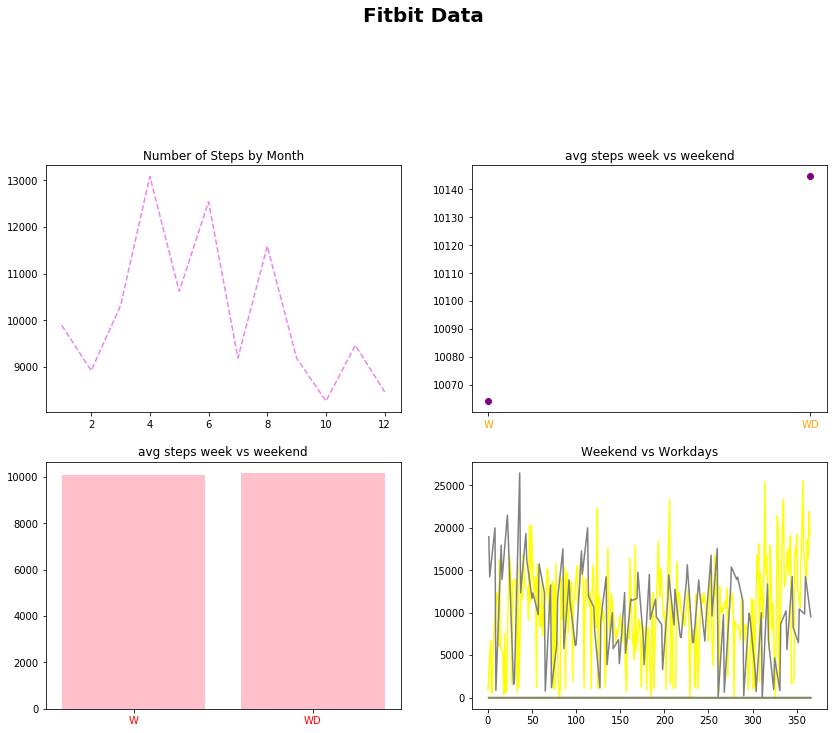

In [11]:
# MEDIAN STEPS BY MONTH_ENCODED
# your code here

#group the columns on Months and aggregate the mean of steps to each Month
avg_step_by_month = fitbit.groupby(fitbit2['Months_encoded']).agg({'Steps':'mean'})

#group the columns on tuple work or weekend the mean value of steps - to have the mean total of step for each of the tuple

step_week_vs_weekend = fitbit.groupby(fitbit2['Work_or_Weekend']).agg({'Steps':'mean'})

#reset index becouse the code before returned the the column that was grouped as index. I could have avoide it by using the paramenter as_index = False
#this resets index as a new column and it dont need to associate to a new variable because inplace was set as true so the changes were made on the original data. (thanks Mattia)
step_week_vs_weekend.reset_index(inplace = True) 

#make of a dictionary for renaming the keys to categorical names 
dic = {step_week_vs_weekend['Work_or_Weekend'][i] :step_week_vs_weekend['Steps'][i]  for i in range(len(step_week_vs_weekend['Steps']))}
dic['week'] = dic.pop(0) #renaming 0 to week
dic['weekend'] = dic.pop(1) # renaming 1 to weekend
xs = list(dic.keys())
ys = list(dic.values())

#wanted to make a graph to see the fluctuation of average steps per week day and per weekend day 
#using conditional to selet
weekend = fitbit2[(fitbit2['Work_or_Weekend']== 0)]

week = fitbit2[(fitbit2['Work_or_Weekend']== 1)]

fig, axes = plt.subplots(2,2, figsize=(14,10))
fig.suptitle('Fitbit Data', y = 1.1, fontweight="bold",  size=20)


axes[0, 0].plot(avg_step_by_month, '--', color= 'violet')
axes[0, 0].set_title('Number of Steps by Month')


axes[0, 1].scatter(xs, ys, color = 'purple')
axes[0, 1].set_title('avg steps week vs weekend')

axes[1, 0].bar(xs, ys, color = 'pink')
axes[1, 0].set_title('avg steps week vs weekend')

axes[1, 1].plot(week, color = 'yellow')
axes[1, 1].plot(weekend, color = 'gray')
axes[1, 1].set_title('Weekend vs Workdays')


#SET ALL PLOTS X AXIS AND Y AXIS TO CERTAIN RANGE
#plt.setp(axes, xticks=[0.1, 0.5, 0.9], xticklabels=['a', 'b', 'c'], yticks=[1, 2, 3])



#CAN COMMENT THIS AND STILL HAVE RESULT BECAUSE OF DICTIONARY THAT WAS MADE BEFORE
plt.sca(axes[0, 1])
plt.xticks(range(2), ['W', 'WD'], color='orange')

plt.sca(axes[1, 0])
plt.xticks(range(2), ['W', 'WD'], color='red')

##############################

#plt.savefig('figures.png') ### to save uncoment 

            
# MEDIAN STEPS BY WORK_OR_WEEKEND
# your code here


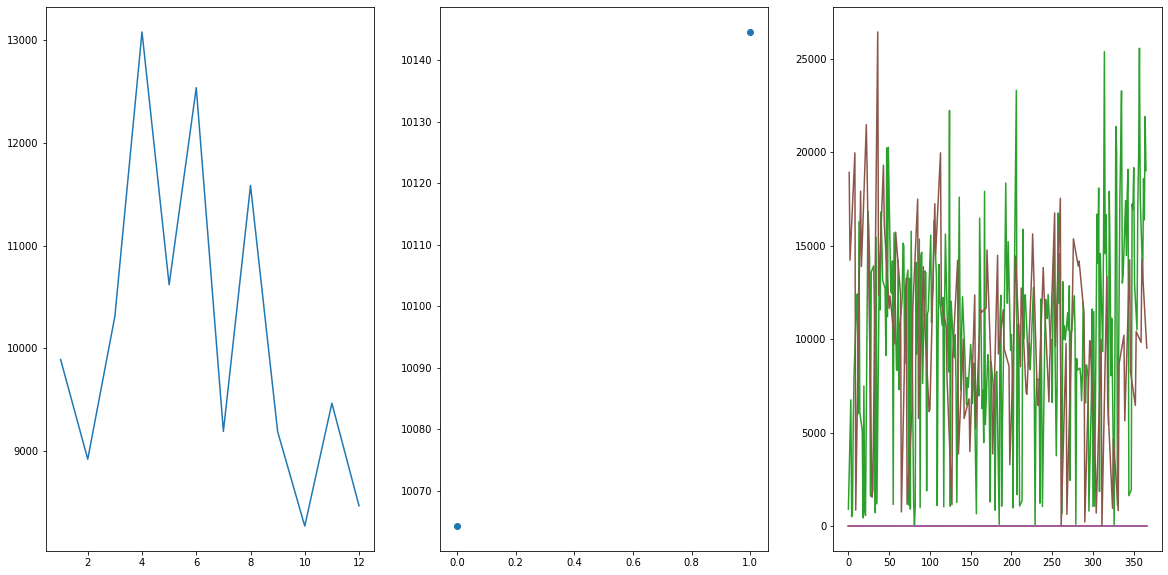

In [12]:
##Trying other way around ... not complete

_, axes = plt.subplots(1, 3, figsize=(20, 10)) # fig, axes = plt.subplots

fi = fitbit.groupby(fitbit2['Months_encoded']).agg({'Steps':'mean'})
plot2 = fitbit.groupby(fitbit2['Work_or_Weekend']).agg({'Steps':'mean'})
plot2.reset_index(inplace = True)
weekend = fitbit2[(fitbit2['Work_or_Weekend']== 0)]
week = fitbit2[(fitbit2['Work_or_Weekend']== 1)]

#colors = ['red', 'yellow', 'pink', 'blue', 'black']
#levels = [2, 4, 8, 10]

for i, ax in enumerate(axes):# enumerate give index and the value in a tu 
    plt.sca(ax)
    if i == 0:
        plt.plot(fi)
        #plt.set_title('Number of Steps by Month') #HOW TO SET TITLE THIS WAY?

    elif i == 1:
        plt.scatter(plot2['Work_or_Weekend'], plot2['Steps'])
    else:
        plt.plot(week)
        plt.plot(weekend)
        

## l = [fi, plot2, .. ] # do it with a list of DataFrame insted of if and elif . but i cant do this if i eant to make two plots in one 

#for i, ax in enumerate(axes):# enumerate give index and the value in a tu 
#    plt.sca(ax)
#    if i == 0:
#        plt.plot(fi)
        #plt.set_title('Number of Steps by Month') #HOW TO SET TITLE THIS WAY?

#    elif i == 1:
#        plt.scatter(plot2['Work_or_Weekend'], plot2['Steps'])
#    else:
#        plt.plot(week)
#        plt.plot(weekend)
        
      

#### Write a loop to plot 3 scatter plots of the following features:

* Minutes Lightly Active vs Steps    
* Minutes Very Active vs Steps    
* Minutes Sedentary vs Steps  

In [13]:
fitbit[['Minutes Lightly Active','Minutes Very Active','Minutes Sedentary']]

,Minutes Lightly Active,Minutes Very Active,Minutes Sedentary
0,46,0,1.355
1,316,60,611.000
2,226,77,602.000
3,190,4,749.000
4,171,0,876.000
...,...,...,...
362,275,79,599.000
363,333,55,684.000
364,287,90,701.000
365,298,85,575.000


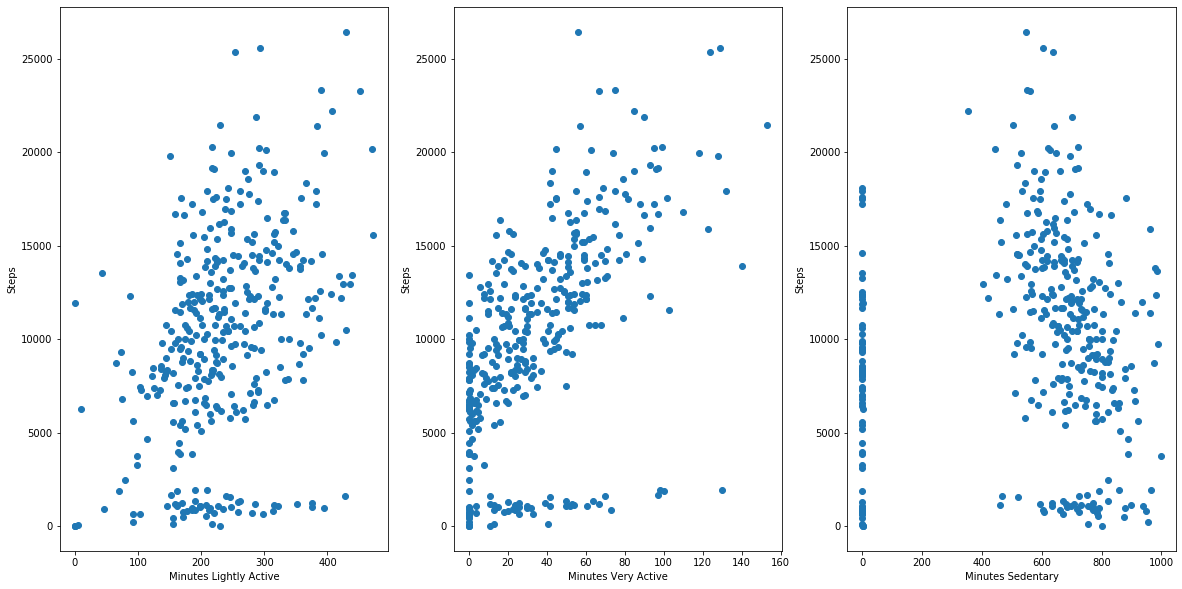

In [14]:
# your code here

fig ,axes = plt.subplots(1, 3, figsize=(20, 10))

features = fitbit[['Minutes Lightly Active','Minutes Very Active','Minutes Sedentary']]

for i, ax in enumerate(axes.flatten()):
    plt.sca(ax)
    
    plt.scatter(features[list(features)[i]],fitbit['Steps'], label='linear')
    
    plt.ylabel('Steps')
    if i == 0:
        plt.xlabel('Minutes Lightly Active')
    elif i == 1:
        plt.xlabel('Minutes Very Active')
    else:
        plt.xlabel('Minutes Sedentary')

## Challenge 3

#### Import the `titanic` dataset and store it in a variable called `titanic`. You can find the dataset in Ironhack's database:
* db: `titanic`
* table: `titanic`

In [148]:
# your code here
titanic = pd.read_csv('titanic.csv')


#### Explore the titanic dataset using Pandas dtypes.

In [149]:
# your code here
titanic

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,U0,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,U0,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,U0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,29.513190,0,0,A.5. 3236,8.0500,U0,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.000000,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.500000,0,0,SOTON/O.Q. 3101262,7.2500,U0,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,29.513190,0,0,359309,8.0500,U0,S


#### What are your numerical variables? What are your categorical variables?
**Hint**: Use Pandas select_dtypes.

In [17]:
# NUMERICAL VARIABLES
# your code here
titanic.select_dtypes(include=['int64'])

,PassengerId,Pclass,SibSp,Parch
0,1,3,1,0
1,2,1,1,0
2,3,3,0,0
3,4,1,1,0
4,5,3,0,0
...,...,...,...,...
1304,1305,3,0,0
1305,1306,1,0,0
1306,1307,3,0,0
1307,1308,3,0,0


In [18]:
# CATEGORICAL VARIABLES
# your code here

titanic.select_dtypes(include=['object'])

,Name,Gender,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,U0,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,U0,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,U0,S
...,...,...,...,...,...
1304,"Spector, Mr. Woolf",male,A.5. 3236,U0,S
1305,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1306,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,U0,S
1307,"Ware, Mr. Frederick",male,359309,U0,S


#### Set the plot style to classic and the figure size to (12,6).
**Hint**: To set the style you can use matplotlib or seaborn functions. Do some research on the matter.

In [41]:

# your code here
from matplotlib.pyplot import figure
plt.style.use('classic')
figure(figsize=(12, 6))#, dpi=80, facecolor='w', edgecolor='k')

<Figure size 960x480 with 0 Axes>

<Figure size 960x480 with 0 Axes>

#### Use the right visulalization to show the distribution of column `Age`.

Text(0, 0.5, 'frquency')

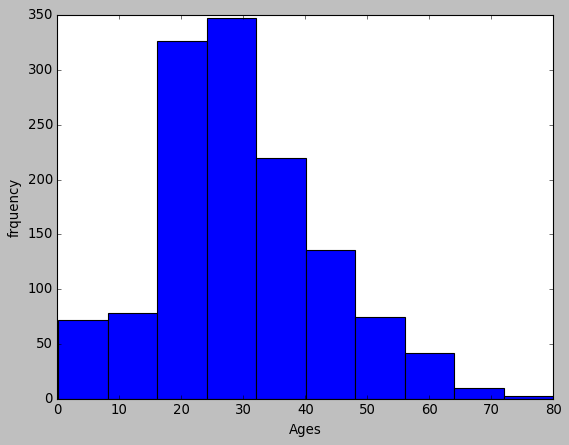

In [42]:
# your code here
#plt.plot 
#titanic['Age'].plt.bar()

plt.hist(titanic['Age'])
plt.xlabel('Ages')
plt.ylabel('frquency')

#### Use subplots and plot the distribution of the `Age`  with bins equal to 10, 20 and 50.

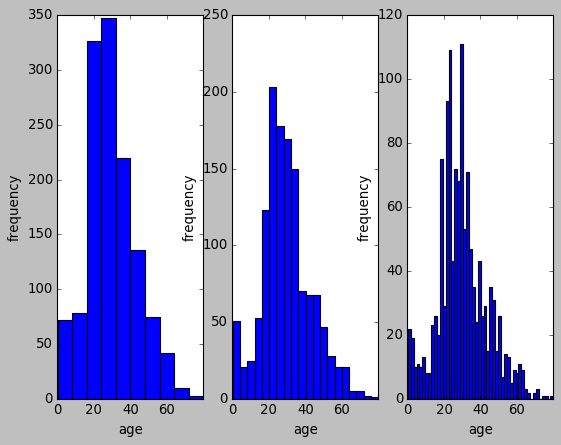

In [231]:
# your code here

f, axes = plt.subplots(1, 3)

bins = [10,20,50]

       
for i, ax in enumerate(axes):
    plt.sca(ax)
    
    plt.hist(titanic['Age'], bins[i])
    plt.xticks(np.arange(80, step=20))



    ax.set(xlabel='age', ylabel='frequency')

#### How does the bin size affect your plot?

In [73]:
"""
your comments here

The bins size make the graph with lower frequencies because they are distributed in more bins.

"""


'\nyour comments here\n\nThe bins size make the graph with lower frequencies because they are distributed in more bins.\n\n'

#### Use seaborn to show the distribution of column `Age`.

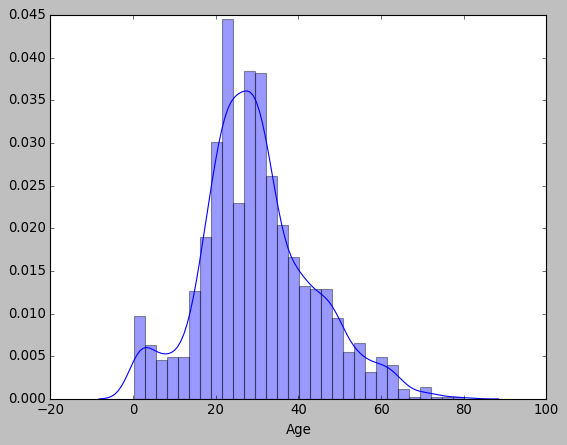

In [156]:
# your code here
import seaborn as sns


sns.distplot(titanic['Age'])

#### Use the right plot to visualize column `Gender`. There are 2 ways of doing it. Do it both ways.
**Hint**: Use matplotlib and seaborn.

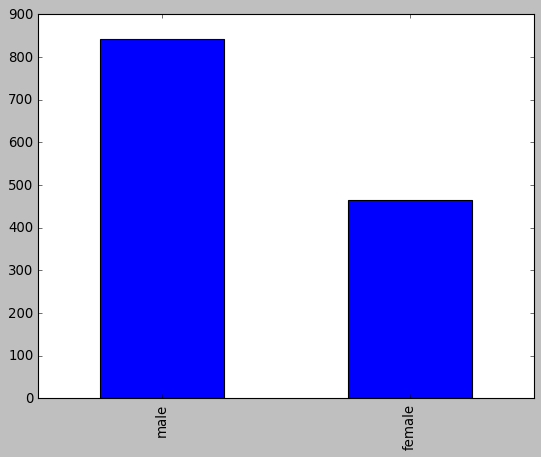

In [180]:
# Method 1 - matplotlib
# your code here


titanic['Gender'].value_counts().plot(kind = 'bar')

#or

#titanic['Gender'].value_counts().plot.bar()



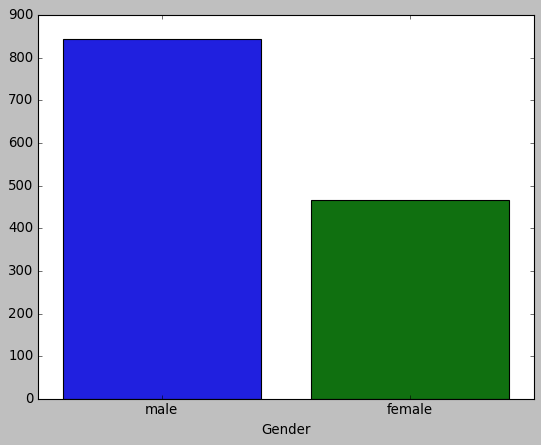

In [187]:
# Method 2 - seaborn
# your code here


#titanic.groupby('Gender').agg({'Gender':'value_counts'})


sns.barplot(x ='Gender', y = titanic['Gender'].value_counts().values, data = titanic)

#### Use the right plot to visualize the column `Pclass`.

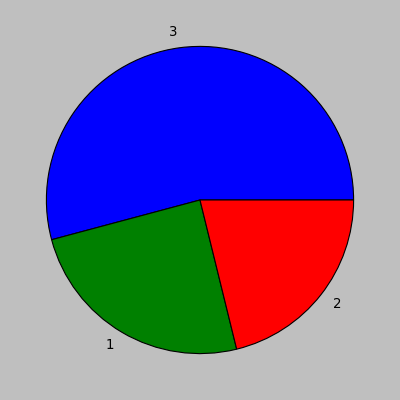

In [206]:
# your code here

#print(titanic['Pclass'].value_counts().values)
#print(titanic['Pclass'].value_counts())

#print(titanic['Pclass'].unique())

plt.pie(titanic['Pclass'].value_counts().values, labels = titanic['Pclass'].unique())

plt.show()



#### We would like to have in one single plot the summary statistics of the feature `Age`. What kind of plot would you use? Plot it. 

count    1309.000000
mean       29.879186
std        13.448335
min         0.170000
25%        22.000000
50%        28.500000
75%        37.000000
max        80.000000
Name: Age, dtype: float64


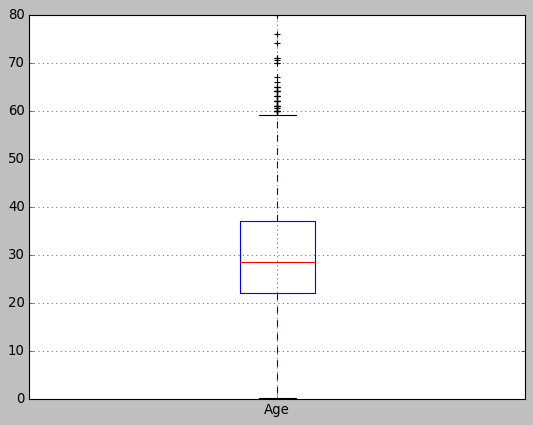

In [212]:
# your code here

print(titanic['Age'].describe())

titanic.boxplot(column='Age')

In [ ]:
"""
your comments here
The Box plot is a good option to summary the statistics 
"""

#### What does the last plot tell you about the feature `Age`?

In [ ]:
"""
your comments here

The Box plot tells me the visualy were the mean is the min the max the 25 quartil, 75 quartil and also the values that are ouliers.
In this case we can se that the average age was around 29 years, the lowest age was some months old and the max around 80.
With this we can also see that there was more similar ages in the second quartail that in the 3 quartil.


"""

#### Now in addition to the summary statistics, we want to have in the same plot the distribution of `Age`. What kind of plot would you use? Plot it. 

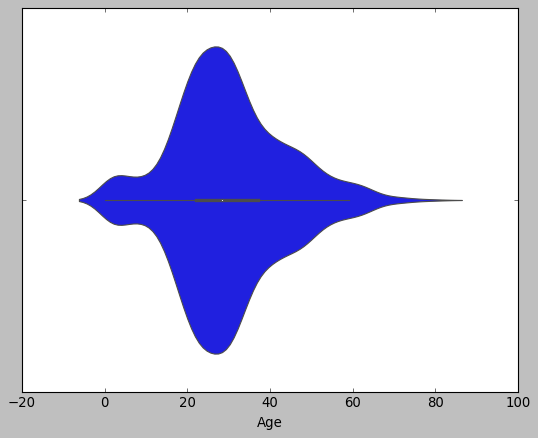

In [214]:
# your code here

sns.violinplot('Age', data = titanic)

#### What additional information does the last plot provide about feature `Age`?

In [ ]:
"""
your comments here

Where the plot is more thick is where the values ar more common, so I use the violin plot to show the distribution of ages 
"""

#### We suspect that there is a linear relationship between `Fare` and `Age`. Use the right plot to show the relationship between these 2 features. There are 2 ways, please do it both ways.
**Hint**: Use matplotlib and seaborn.

Text(0, 0.5, 'Fare')

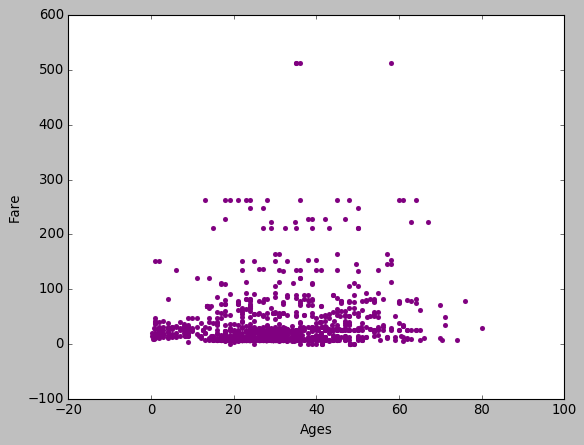

In [225]:
# Method 1 - matplotlib
# your code here

plt.scatter(titanic['Age'] ,titanic['Fare'], color='purple', linewidth=0.1)

plt.xlabel('Ages')
plt.ylabel('Fare')

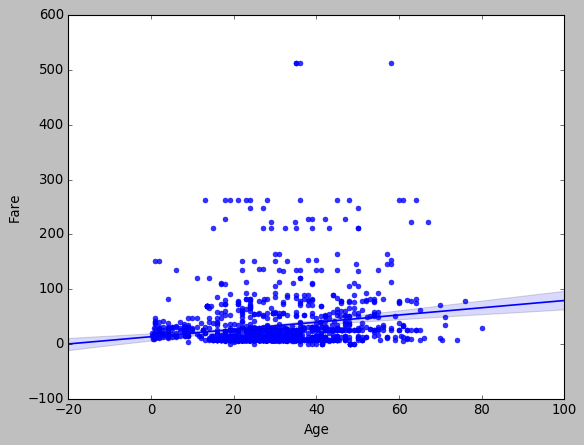

In [216]:
# Method 2 - seaborn
# your code here

sns.regplot(x="Age", y="Fare", data=titanic)

#### Plot the correlation matrix using seaborn.

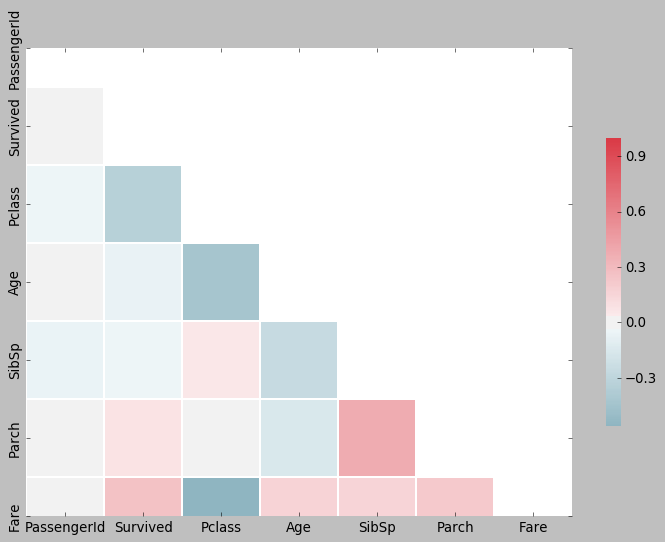

In [230]:
# your code here

##Completly copied from https://seaborn.pydata.org/examples/many_pairwise_correlations.html

corr = titanic.corr()

f, ax = plt.subplots(figsize=(11, 9))

mask = np.triu(np.ones_like(corr, dtype=np.bool)) # can remove this to have the full matrix

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


#sns.heatmap(corr)

#### What are the most correlated features?

In [ ]:
"""
your comments here


Parch and Sibp - The parent and childeren is of courese related to the sibling and spouses. The parents would certanly bring their all the sons 

Fare and Survived - The rich add more probability to survive that the poo -- interesting 


"""

#### Use the most appropriate plot to display the summary statistics of `Age` depending on `Pclass`.

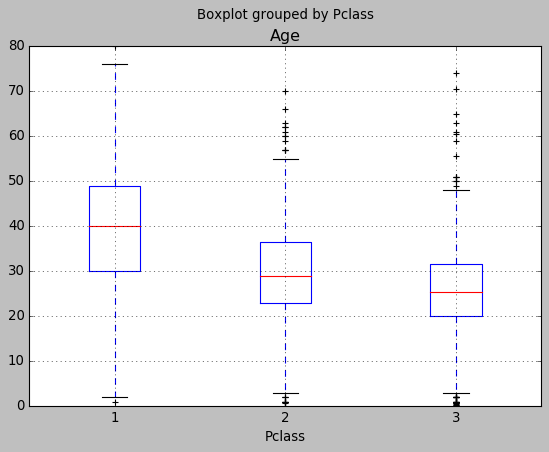

In [239]:
# your code here

#sns.boxplot(x = 'Pclass', y = 'Age', data = titanic)

#or 

titanic.boxplot(column='Age', by='Pclass')

#### Use seaborn to plot the distribution of `Age` based on the `Gender`.
**Hint**: Use Facetgrid.

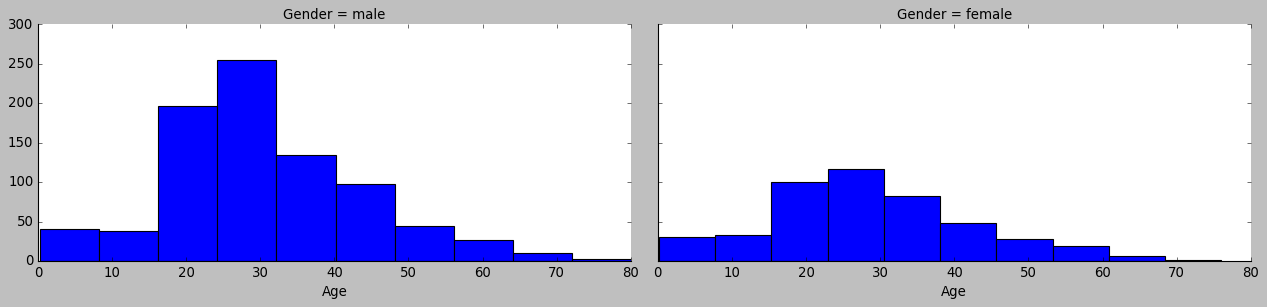

In [257]:
# your code here



g = sns.FacetGrid(titanic, col="Gender", height=4, aspect=2)
g = g.map(plt.hist, "Age")